In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [50]:
from datetime import date
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [14]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [15]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
# Use `engine.execute` to select and display the first 5 rows from the measurement table
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [17]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [19]:
# Use `engine.execute` to select and display rows from the station table
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

####  Design a query to retrieve the last 12 months of precipitation data and plot the results
#### Calculate the date 1 year ago from the last data point in the database
#### Perform a query to retrieve the data and precipitation scores
#### Save the query results as a Pandas DataFrame and set the index to the date column
#### Sort the dataframe by date
#### Use Pandas Plotting with Matplotlib to plot the data

In [20]:
# Latest date from the measurement table
import datetime
ld=session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
lastDate = datetime.datetime.strptime(ld, '%Y-%m-%d')
print("Latest date in measurement table: ", lastDate)

Latest date in measurement table:  2017-08-23 00:00:00


In [21]:
# Calculate the date 1 year ago from the last data point in the database
lastDate_1_year =  lastDate - dt.timedelta(days=365)
print("Previous year from latest date in measurement table: ", lastDate_1_year)

Previous year from latest date in measurement table:  2016-08-23 00:00:00


In [22]:
# Query to get dates & precipitation for the previous year from last date in table [08/23/2017]
precip_results = session.query(Measurement.date, Measurement.prcp).\
       filter(Measurement.date >= lastDate_1_year, Measurement.date <= lastDate).all()

In [23]:
# Unpack the `date` and `precip` from precip_results and save into separate lists
dates = [result[0] for result in precip_results[:]]
precipitation = [result[1] for result in precip_results[:]]

# Create the Dataframe from the dates and precipitation 
precip_df = pd.DataFrame()
precip_df['Date'] = dates
precip_df['Precipitation'] = precipitation
precip_df.set_index('Date',inplace=True)
precip_df['Precipitation'].fillna(0, inplace=True)
precip_df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


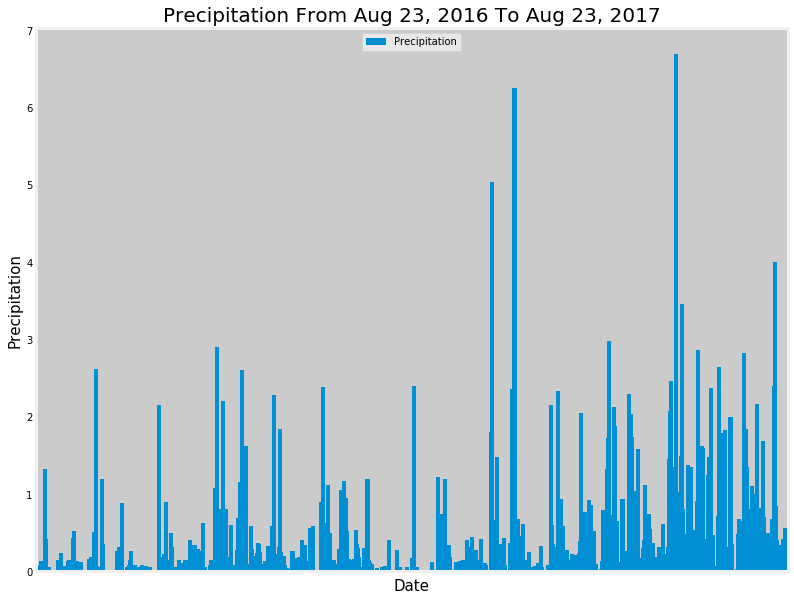

In [24]:
# Create a bar chart and plot the `precip` on the y-axis and the `date` on the x-axis
ax = precip_df.plot(kind='bar', legend=True, figsize=(12,10), width=12.0 )
ax.set_title("Precipitation From Aug 23, 2016 To Aug 23, 2017", fontsize=20)
ax.set_ylabel("Precipitation", fontsize=15)
ax.set_xlabel('Date', fontsize=15)
plt.legend(loc='upper center')
ax.grid(True)
ax.set_facecolor('white')
# Remove the dates from x axis as per HW image 
ax.set_xticklabels([])
plt.show()

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Using data for the year from 2016 to 2017
precip_df.describe()

,Precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [26]:
# Design a query to show how many stations are available in this dataset?
distinct_count = session.query(Station.station).distinct(Station.station).count()
distinct_count

9

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs) ).\
        filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [29]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
        order_by(func.count(Measurement.tobs).desc()).first()

('USC00519281', 2772)

In [30]:
#Station Name for 'USC00519281'
max_temp_station = session.query(Station.name).filter(Station.station == 'USC00519281').all()
max_temp_station[0][0]

'WAIHEE 837.5, HI US'

In [31]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12mnths_temp = session.query(Measurement.tobs).\
        filter(Measurement.date >= lastDate_1_year, Measurement.date <= lastDate).\
        filter(Measurement.station == 'USC00519281').all()

In [32]:
# Unpack the `temp` and `count` from last12mnths_temp and save into separate lists
temps = [result[0] for result in last12mnths_temp[:]]

# Create the Dataframe from the dates and precipitation 
temps_df = pd.DataFrame()
temps_df['Temperature'] = temps
temps_df.head()

,Temperature
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


Text(0.5, 1.0, 'Histogram of Temperatures Recorded at WAIHEE 837.5, HI US')

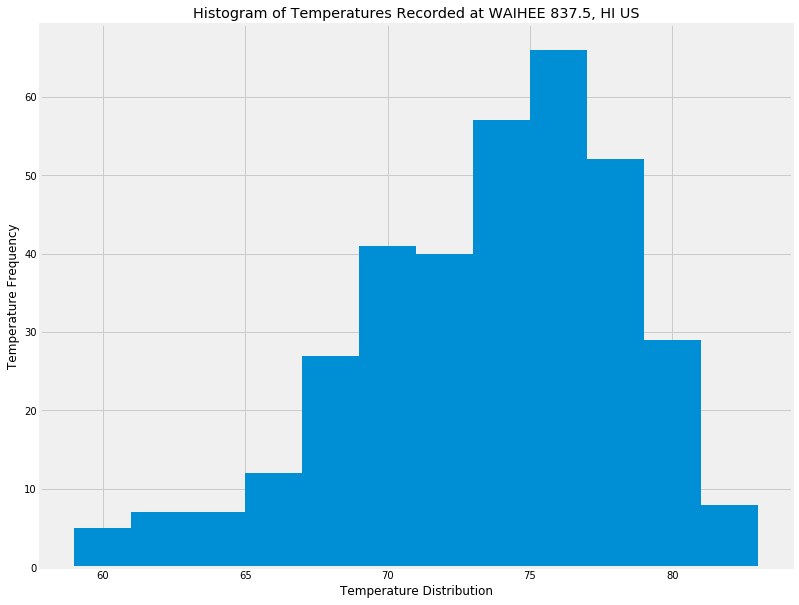

In [33]:
# plot the results as a histogram
temps_df.hist(column='Temperature', grid=True, figsize=(12,10), bins = 12)
plt.xlabel('Temperature Distribution')
plt.ylabel('Temperature Frequency')
plt.title('Histogram of Temperatures Recorded at ' + max_temp_station[0][0])


In [34]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
prev_yr_temp_calc = calc_temps('2011-02-28', '2011-03-05')
prev_yr_temp_calc

[(61.0, 69.75510204081633, 75.0)]

<BarContainer object of 1 artists>

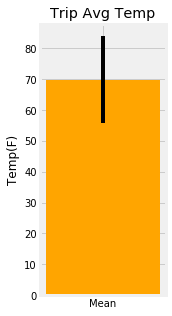

In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2,5));
plt.title('Trip Avg Temp')
plt.ylabel('Temp(F)')
plt.bar(['Mean'], prev_yr_temp_calc[0][1], yerr=(75-61), color = 'orange')

In [37]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
engine.execute('SELECT station.station, station.name, station.latitude, station.longitude, station.elevation, sum(measurement.prcp) precip \
FROM station, measurement \
WHERE station.station = measurement.station \
AND date between "2012-02-28" and "2012-03-05" \
GROUP BY station.station, station.name, station.latitude, station.longitude, station.elevation \
ORDER BY precip desc').fetchall()

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 11.08),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 10.32),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 5.79),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 3.8400000000000003),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2.92),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.1800000000000002),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.76),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.03),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]

## Optional Challenge Assignment

In [38]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [39]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []
# Set the start and end date of the trip
start = datetime.datetime.strptime("01-01-2018", "%m-%d-%Y")
end = datetime.datetime.strptime("01-07-2018", "%m-%d-%Y")

# Use the start and end date to create a range of dates
my_date_range = pd.date_range(start, end, freq = 'D')
# Stip off the year and save a list of %m-%d strings
for num, dt in enumerate(my_date_range):
    x = dt.strftime("%m") + '-' + dt.strftime("%d")
    normals.append(x)

# Loop through the list of %m-%d strings and calculate the normals for each date
results = []
for num, dnd in enumerate(normals):
    results.append(daily_normals(dnd))

results

[[(62.0, 69.15384615384616, 77.0)],
 [(60.0, 69.39622641509433, 77.0)],
 [(62.0, 68.9090909090909, 77.0)],
 [(58.0, 70.0, 76.0)],
 [(56.0, 67.96428571428571, 76.0)],
 [(61.0, 68.96491228070175, 76.0)],
 [(57.0, 68.54385964912281, 76.0)]]

In [40]:
#Split the data
tmin = []
for i in range(len(results)):
    tmin.append(results[i][0][0])

tavg = []
for i in range(len(results)):
    tavg.append(results[i][0][1])

tmax = []
for i in range(len(results)):
    tmax.append(results[i][0][2])

In [69]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Create the Dataframe from the dates and precipitation 

trip_df = pd.DataFrame()

trip_df['Date'] = my_date_range
trip_df['tmin'] = tmin
trip_df['tavg'] = tavg
trip_df['tmax'] = tmax


trip_df.set_index('Date',inplace=True)

trip_df.head()

,tmin,tavg,tmax
Date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


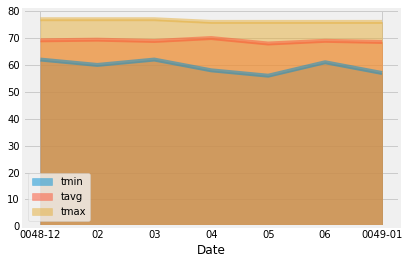

In [75]:
# Plot the daily normals as an area plot with `stacked=False`
ax = trip_df.plot.area(stacked=False)